# Compare simulation results

In [32]:
"""
Helper class for comparing simulation results.
"""
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint
import warnings

class DataSetsComparison(object):
    """ Class for handling simple comparison of datasets.
    Currently only supports 2 data sets in CSV.
    """
    eps = 1E-3  # tolerance for comparison 
    
    def __init__(self, files, columns):
        self.files = files
        self.columns = columns
        
        assert len(self.files) == len(self.columns)
        for column in self.columns:
            assert len(column) == len(self.columns[0])
            
        self.read_dfs()
        self.diff = self.df_diff()
        
    def read_dfs(self):
        """ Read the dataframes using the files and given column ids."""
        dfs = [pd.read_csv(file) for file in self.files]
        self.dfs = []
        for k, df in enumerate(dfs):
            cols = self.columns[k]
            file = self.files[k]
            df1 = df[cols]
            df1.columns = self.columns[0]  # unify columns
            self.dfs.append(df1)
        return self.dfs

    def df_diff(self):
        """ Difference data set between the files."""
        return self.dfs[0]-self.dfs[1]
    
    def is_equal(self):
        return abs(self.diff.abs().max().max()) <= DataSetsComparison.eps

    def info(self):
        pprint(self.files)
        pprint(self.columns)
        
    def print_diff(self):
        print("\n# Elements")
        print(self.diff.shape)
        
        print("\n# Maximum column difference")
        print(self.diff.abs().max())
        
        print("\n# Maximum element difference")
        print(self.diff.abs().max().max())
        
        print("\n# Datasets are equal (diff <= eps={})".format(DataSetsComparison.eps))
        print(self.is_equal())
        if not (self.is_equal()):
            warnings.warn("Datasets are not equal !")
        
              
    def plot_diff(self):
        for cid in self.diff.columns:
            plt.plot(self.diff[cid], label=cid)
        plt.legend()
        plt.show()
        
    def report(self):
        print("*" * 80)
        self.info()
        self.print_diff()
        print("*" * 80)
        self.plot_diff()
        self.diff

## toy_wholecell

********************************************************************************
['./toy_wholecell/toy_wholecell_mk_v14-sbmlutils.csv',
 './toy_wholecell/toy_wholecell_mk_v10-ibiosim.csv']
[['time', '[A]', '[C]', '[D]'], ['Time', 'A (1)', 'C (1)', 'D (1)']]

# Elements
(51, 4)

# Maximum column difference
time    0.000000
[A]     0.000112
[C]     0.000047
[D]     0.000107
dtype: float64

# Maximum element difference
0.000111954984088

# Datasets are equal (diff <= eps=0.001)
True
********************************************************************************


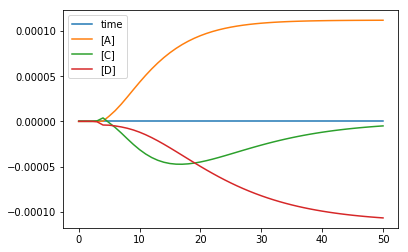

In [33]:
wholecell_dsc = DataSetsComparison(
    files = [
        "./toy_wholecell/toy_wholecell_mk_v14-sbmlutils.csv",
        "./toy_wholecell/toy_wholecell_mk_v10-ibiosim.csv"
    ],
    columns = [
        ["time", "[A]", "[C]", "[D]"],
        ["Time", "A (1)", "C (1)", "D (1)"],
    ]
)

wholecell_dsc.report()